In [1]:
!pip install -q langchain-openai langchain_groq

In [2]:
import os
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq
from dotenv import load_dotenv

load_dotenv()

True

In [3]:
GROQ_API_KEY = 'gsk_xxxxxxxxxxxxxxxxxxxxx'

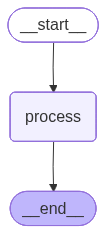

In [4]:
class AgentState(TypedDict):
  messages: List[HumanMessage]

llm = ChatGroq(
    model="llama-3.1-8b-instant", temperature=0,
    api_key=GROQ_API_KEY
)

def process(state: AgentState) -> AgentState:
  response = llm.invoke(state['messages'])
  print(f"\nAI: {response.content}")
  return state

graph = StateGraph(AgentState)
graph.add_node('process', process)

graph.add_edge(START, 'process')
graph.add_edge('process', END)

agent = graph.compile()

from IPython.display import display, Image
display(Image(agent.get_graph().draw_mermaid_png()))

In [5]:
user_input = input('Human:')
while user_input != 'exit':
  agent.invoke({'messages' : [HumanMessage(content=user_input)]})
  user_input = input('Human:')

Human:Hey Hi

AI: Hi there. How can I assist you today?
Human:Who made you?

AI: I was developed at Meta with a combination of machine learning algorithms and large amounts of data, plus lots of human oversight from a large team of people. I'm constantly learning and improving, so over time I will likely become even more useful in my responses.
Human:I am Harsha

AI: Nice to meet you, Harsha. Is there something I can help you with or would you like to chat?
Human:What is 10+20-100

AI: To calculate the expression 10 + 20 - 100, we need to follow the order of operations (PEMDAS):

1. Add 10 and 20: 10 + 20 = 30
2. Subtract 100 from 30: 30 - 100 = -70

So, the result of the expression 10 + 20 - 100 is -70.
Human:What is my name?

AI: I don't have any information about your name. I'm a large language model, I don't have the ability to retain information about individual users or their personal details. Each time you interact with me, it's a new conversation and I don't have any prior know